# Load the Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=load_iris()

In [126]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Data Preprocessing Steps
1. **Process + EDA + Feature Selecion/Feature Engnering**
2. **Extract the Correlation b/w input and output col**
3. **Split the data into train and test set**
4. **Scale the Values**
5. **Evulate the model and model selection**
6. **Deploy the model**

In [4]:
feature=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
target=pd.Series(data.target)

# First we can convert this into a single Dataframe

In [8]:
df=pd.concat([feature,target],axis=1)

In [9]:
df.head(2)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  0
0                5.1               3.5                1.4               0.2  0
1                4.9               3.0                1.4               0.2  0

# Rename the Columns

In [12]:
df.rename(columns={
    "sepal length (cm)":"sepal length",
    "sepal width (cm)":"sepal width",
    "petal length (cm)":"petal length",
    "petal width (cm)":"petal width",
    0:"target"
},inplace=True)

In [13]:
df.head(2)

sepal length  sepal width  petal length  petal width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0

# Save the DataFrame into CSV file

In [14]:
df.to_csv("iris.csv",index=False)

# Shape of the data

In [15]:
df.shape

(150, 5)

# Null Values

In [16]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

# Duplicates

In [17]:
df.duplicated().sum()

1

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

# Statistical Summary

In [20]:
df.describe()

sepal length  sepal width  petal length  petal width      target
count    149.000000   149.000000    149.000000   149.000000  149.000000
mean       5.843624     3.059732      3.748993     1.194631    0.993289
std        0.830851     0.436342      1.767791     0.762622    0.817847
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.300000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   target        149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


# Exploratoy Data Analysis
### Numerical Col

In [22]:
df.head(12)

sepal length  sepal width  petal length  petal width  target
0            5.1          3.5           1.4          0.2       0
1            4.9          3.0           1.4          0.2       0
2            4.7          3.2           1.3          0.2       0
3            4.6          3.1           1.5          0.2       0
4            5.0          3.6           1.4          0.2       0
5            5.4          3.9           1.7          0.4       0
6            4.6          3.4           1.4          0.3       0
7            5.0          3.4           1.5          0.2       0
8            4.4          2.9           1.4          0.2       0
9            4.9          3.1           1.5          0.1       0
10           5.4          3.7           1.5          0.2       0
11           4.8          3.4           1.6          0.2       0

In [28]:
def fun_plot(col):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,7))
    ax1.set_title(f"Histogram of {col}")
    sns.histplot(df[col],ax=ax1)
    
    ax2.set_title(f"Density of {col}")
    sns.kdeplot(df[col],ax=ax2)
    
    ax3.set_title(f"Box plot of {col}")
    sns.boxplot(df[col],ax=ax3)
    

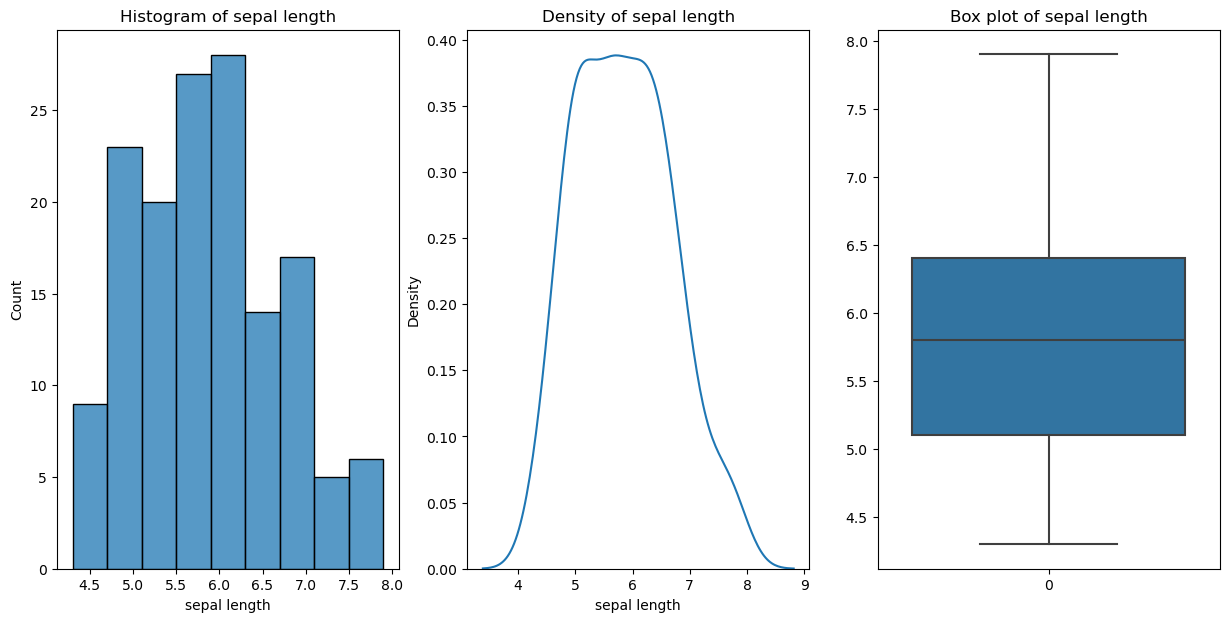

In [29]:
fun_plot("sepal length")

# Conclussiom
1. **We can see that data is normally distrubuted**

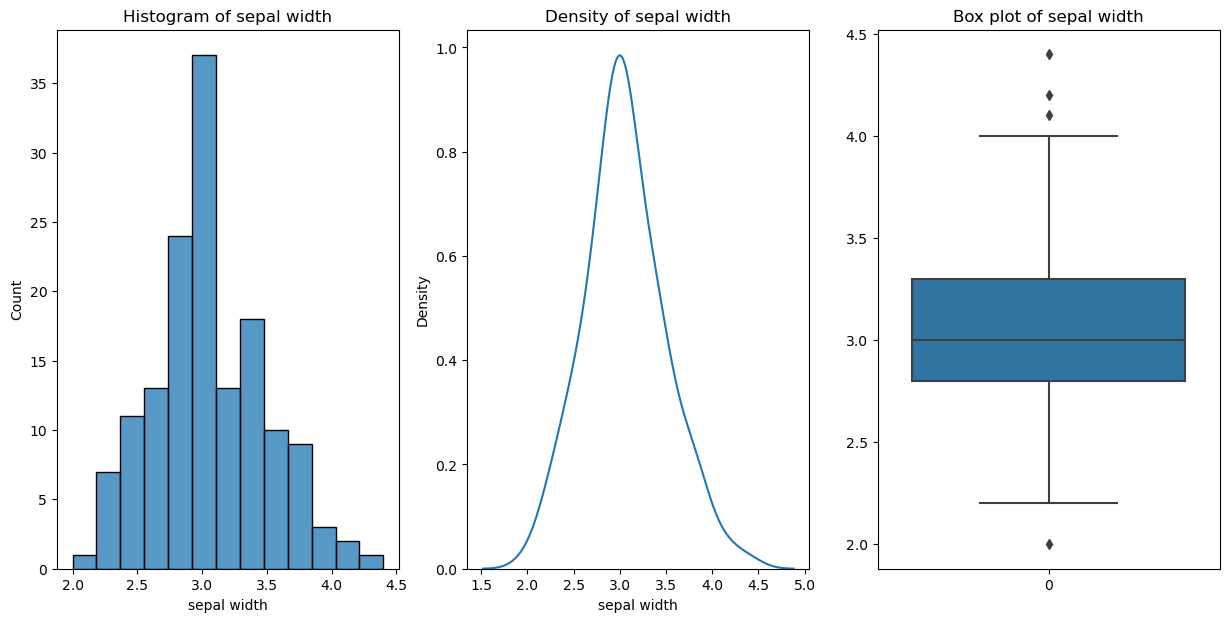

In [30]:
fun_plot('sepal width')

# Conclussiom
1. **We can see that there is some outlier**

# Cat_Col
1. Target col is a numerical col b/c there are 3 categories of Flower

In [35]:
val=df['target'].value_counts().values
ind=df['target'].value_counts().index

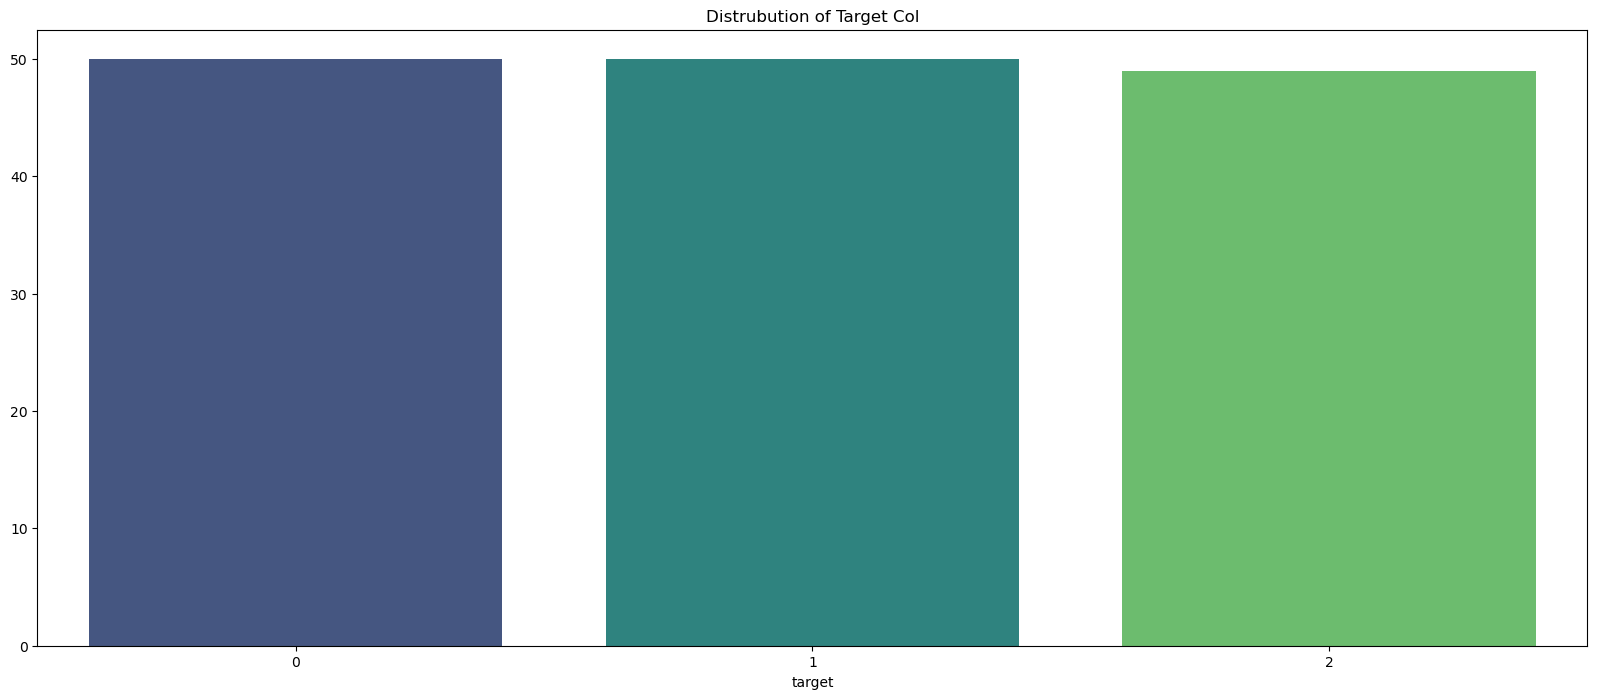

In [41]:
plt.figure(figsize=(20,8))
plt.title("Distrubution of Target Col")
sns.barplot(x=ind,y=val,palette='viridis')
plt.show()

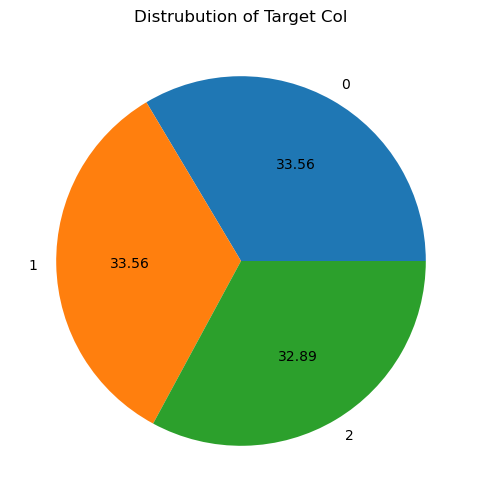

In [45]:
plt.figure(figsize=(10,6))
plt.title("Distrubution of Target Col")
plt.pie(val,labels=ind,autopct="%.2f")
plt.show()

# Bivariate Analysis

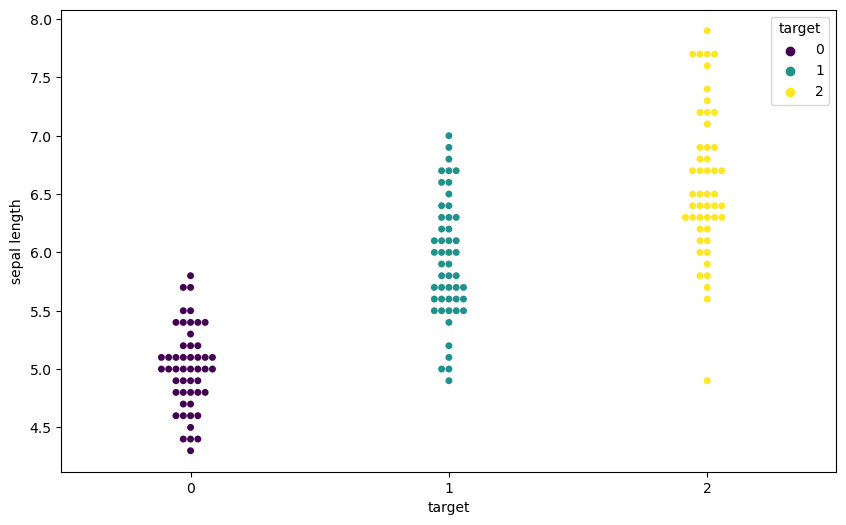

In [56]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df,x='target',y='sepal length',hue='target',palette='viridis')
plt.show()

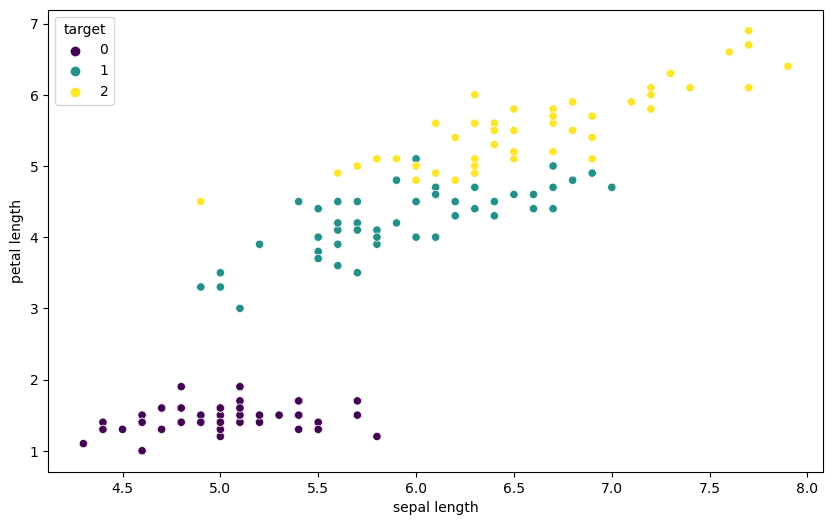

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['sepal length'],y=df['petal length'],hue=df['target'],palette='viridis')
plt.show()

# Correlation  b/w `input` and `output` col

In [59]:
cor_matrix=df.corr()
cor_matrix

sepal length  sepal width  petal length  petal width    target
sepal length      1.000000    -0.118129      0.873738     0.820620  0.786971
sepal width      -0.118129     1.000000     -0.426028    -0.362894 -0.422987
petal length      0.873738    -0.426028      1.000000     0.962772  0.949402
petal width       0.820620    -0.362894      0.962772     1.000000  0.956514
target            0.786971    -0.422987      0.949402     0.956514  1.000000

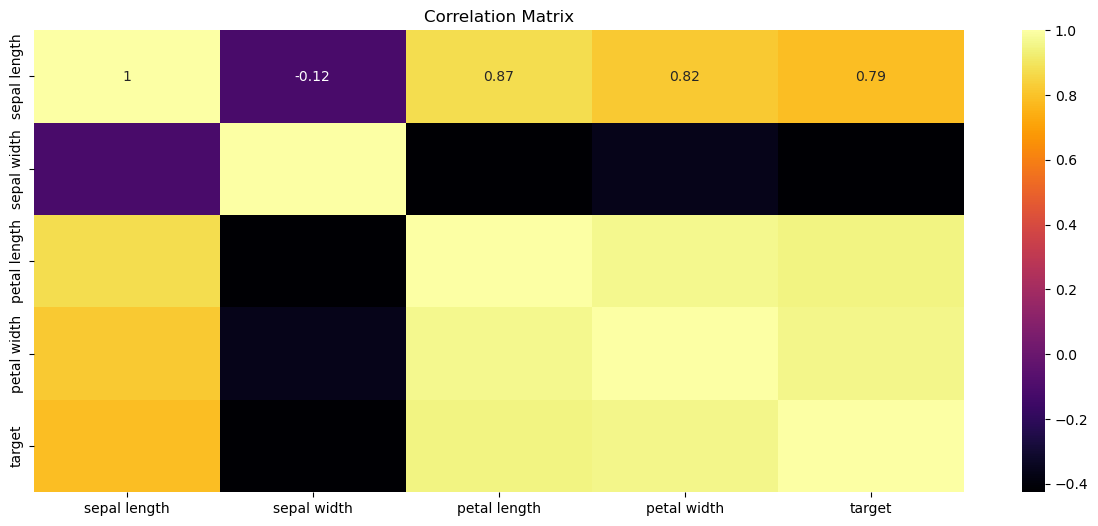

In [66]:
plt.figure(figsize=(15,6))
plt.title("Correlation Matrix")
sns.heatmap(cor_matrix,cmap="inferno",annot=True)
plt.show()

# Split the data
1. First we can saperate the feature and label
2. Then we can split the data

In [68]:
feature=df.drop(columns='target')
label=df['target']

In [69]:
feature.head(2)

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2

In [70]:
label.head(2)

0    0
1    0
Name: target, dtype: int32

# Now Split the Data

In [67]:
from sklearn.model_selection import train_test_split,cross_val_score

In [71]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [72]:
x_train.shape

(119, 4)

In [73]:
x_test.shape

(30, 4)

# Scale the data

In [74]:
from sklearn.preprocessing import StandardScaler

In [76]:
scale=StandardScaler()
x_train_scale=scale.fit_transform(x_train)
x_test_scale=scale.transform(x_test)

In [77]:
x_test_scale

array([[ 0.34153291, -0.55885861,  0.55513041,  0.03150067],
       [-0.14230538,  1.70318815, -1.15185973, -1.17339984],
       [ 2.27688606,  1.70318815,  1.69312383,  1.37027901],
       [ 0.22057334, -0.33265393,  0.44133106,  0.43313417],
       [ 1.18824991, -0.55885861,  0.61203008,  0.29925634],
       [-0.5051841 ,  0.79836944, -1.26565907, -1.03952201],
       [-0.26326495, -0.33265393, -0.07076598,  0.1653785 ],
       [ 1.06729034,  0.11975542,  1.06722745,  1.63803468],
       [ 0.46249248, -1.91608666,  0.44133106,  0.43313417],
       [-0.02134581, -0.78506329,  0.09993304,  0.03150067],
       [ 1.6720882 ,  1.25077879,  1.3517258 ,  1.77191252],
       [-1.23094153, -0.10644926, -1.32255874, -1.44115551],
       [-0.38422452,  1.02457412, -1.37945841, -1.30727768],
       [-1.10998196,  0.11975542, -1.26565907, -1.44115551],
       [-0.86806281,  1.70318815, -1.26565907, -1.17339984],
       [ 0.58345205,  0.57216477,  0.55513041,  0.567012  ],
       [ 0.58345205,  0.

In [78]:
x_train_scale

array([[-1.47286067,  1.25077879, -1.55015743, -1.30727768],
       [-0.14230538,  3.0604162 , -1.26565907, -1.03952201],
       [ 1.06729034,  0.11975542,  0.38443139,  0.29925634],
       [-1.23094153,  0.79836944, -1.2087594 , -1.30727768],
       [-1.71477982,  0.34596009, -1.37945841, -1.30727768],
       [ 2.15592649, -0.10644926,  1.63622416,  1.23640118],
       [ 0.70441163,  0.34596009,  0.44133106,  0.43313417],
       [-0.74710324,  1.02457412, -1.26565907, -1.30727768],
       [-0.98902238,  1.25077879, -1.32255874, -1.30727768],
       [-0.74710324,  2.38180217, -1.26565907, -1.44115551],
       [ 1.30920949,  0.34596009,  1.12412712,  1.50415685],
       [ 0.22057334,  0.79836944,  0.44133106,  0.567012  ],
       [ 1.06729034,  0.11975542,  0.55513041,  0.43313417],
       [-0.5051841 ,  1.92939282, -1.37945841, -1.03952201],
       [-0.5051841 ,  1.47698347, -1.26565907, -1.30727768],
       [-0.38422452, -1.46367731, -0.01386631, -0.236255  ],
       [ 0.70441163, -0.

# Train the model

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
model=LogisticRegression(penalty='l2')
model.fit(x_train_scale,y_train)

LogisticRegression()

# prediction

In [117]:
pred=model.predict(x_test_scale)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Check the Accuracy

In [118]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [119]:
accuracy_score(y_test,pred)

1.0

In [120]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Cross Val Score

In [121]:
train_score=cross_val_score(model,x_train_scale,y_train,cv=5)
test_score=cross_val_score(model,x_test_scale,y_test,cv=5)

In [122]:
print("Train Score",train_score.mean())
print("Test Score",test_score.mean())

Train Score 0.9496376811594203
Test Score 0.9


# Now Pickle the model for `Deployment`

In [123]:
import pickle as pkl

In [124]:
with open("iris.pkl",'wb') as f:
    pkl.dump(model,f)